# Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")

In [3]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

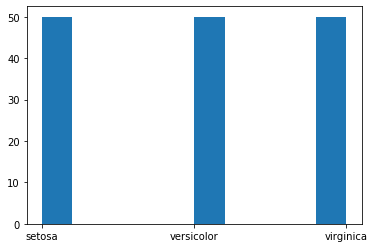

In [5]:
plt.hist(data.Species)

In [6]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
colnames = data.columns.tolist()
predictors = colnames[:4]
target = colnames[4]

In [8]:
data["is_train"] = np.random.uniform(int(0) ,int( 1) ,len(data)) <= 0.75

In [9]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [10]:
train, test = data[data["is_train"] == True] , data[data["is_train"] == False]

In [11]:
train, test

(     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species  is_train
 0             5.1          3.5           1.4          0.2     setosa      True
 1             4.9          3.0           1.4          0.2     setosa      True
 3             4.6          3.1           1.5          0.2     setosa      True
 4             5.0          3.6           1.4          0.2     setosa      True
 6             4.6          3.4           1.4          0.3     setosa      True
 ..            ...          ...           ...          ...        ...       ...
 144           6.7          3.3           5.7          2.5  virginica      True
 145           6.7          3.0           5.2          2.3  virginica      True
 146           6.3          2.5           5.0          1.9  virginica      True
 147           6.5          3.0           5.2          2.0  virginica      True
 149           5.9          3.0           5.1          1.8  virginica      True
 
 [110 rows x 6 columns],
      Sepal.L

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20,random_state=99)
tree.fit(train[predictors],train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [14]:
preds = tree.predict(test[predictors])

In [15]:
pd.crosstab(test[target],preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,20,0,0
versicolor,0,6,3
virginica,0,0,11


# Visualización del árbol de decisión

In [31]:
from sklearn.tree import export_graphviz

In [32]:
with open("resources/iris_dtree.dot","w") as dotfile:
    export_graphviz(tree,out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [45]:
import os
from graphviz  import Source
os.environ["PATH"] += os.pathsep + 'D:/Anaconda/Anaconda3/Library/bin/graphviz'

In [46]:
file = open("resources/iris_dtree.dot","r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.572\\nsamples = 110\\nvalue = [30, 41, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 30\\nvalue = [30, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Length <= 4.75\\nentropy = 1.0\\nsamples = 80\\nvalue = [0, 41, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Sepal.Length <= 4.95\\nentropy = 0.176\\nsamples = 38\\nvalue = [0, 37, 1]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 37\\nvalue = [0, 37, 0]"] ;\n3 -> 5 ;\n6 [label="Petal.Width <= 1.85\\nentropy = 0.454\\nsamples = 42\\nvalue = [0, 4, 38]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.837\\nsamples = 15\\nvalue = [0, 4, 11]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 27\\nvalue = [0, 0, 27]"] ;\n6 -> 8 ;\n}'

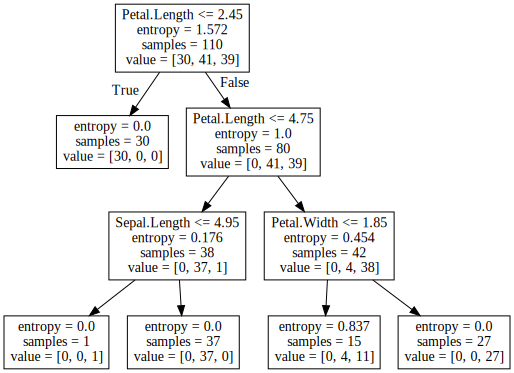

In [47]:
Source(text)

# Cross Validation para la poda

In [50]:
X = data[predictors]
Y = data[target]

In [52]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5,min_samples_split=20,random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [60]:
from sklearn.model_selection  import KFold
from sklearn.model_selection import StratifiedKFold

In [65]:
cv = KFold( n_splits= 10, shuffle=True, random_state=1)

In [66]:
from sklearn.model_selection import cross_val_score

In [71]:
scores = cross_val_score(tree,X,Y,scoring="accuracy",cv = cv,n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [72]:
score = np.mean(scores)
score

0.9333333333333333

In [76]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i,min_samples_split=20,random_state=99)
    tree.fit(X,Y)
    cv = KFold( n_splits= 10, shuffle=True, random_state=1)
    scores = cross_val_score(tree,X,Y,scoring="accuracy",cv = cv,n_jobs=1)
    score = np.mean(scores)
    print("Score para i =",i,"es de ", score)
    print(" ",tree.feature_importances_)

Score para i = 1 es de  0.5666666666666667
  [0. 0. 1. 0.]
Score para i = 2 es de  0.9200000000000002
  [0.         0.         0.66620285 0.33379715]
Score para i = 3 es de  0.9400000000000001
  [0.         0.         0.68976981 0.31023019]
Score para i = 4 es de  0.9333333333333333
  [0.         0.         0.66869158 0.33130842]
Score para i = 5 es de  0.9333333333333333
  [0.         0.         0.66869158 0.33130842]
Score para i = 6 es de  0.9333333333333333
  [0.         0.         0.66869158 0.33130842]
Score para i = 7 es de  0.9333333333333333
  [0.         0.         0.66869158 0.33130842]
Score para i = 8 es de  0.9333333333333333
  [0.         0.         0.66869158 0.33130842]
Score para i = 9 es de  0.9333333333333333
  [0.         0.         0.66869158 0.33130842]
Score para i = 10 es de  0.9333333333333333
  [0.         0.         0.66869158 0.33130842]


In [77]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']